Self Attention Test

In [36]:
import torch

T = 7
d_x = 3
d_l = 5
d_q = 6

<h>Define Weights matrix and input<h>

In [39]:
X = torch.randn([d_x, T])
print(X)
print(X.shape)
W_q = torch.randn([d_q, d_x])
print(W_q)
print(W_q.shape)
W_k = torch.randn([d_q, d_x])
print(W_k)
print(W_k.shape)
W_v = torch.randn([d_l, d_x])
print(W_v)
print(W_v.shape)

tensor([[-0.7427,  0.6975, -0.5072,  1.4141, -1.0487,  0.2024, -0.5288],
        [-1.9591, -1.3847,  1.6204, -0.4307,  0.1128,  0.2761, -0.5959],
        [ 0.1688,  1.4023,  1.5033, -0.0732,  0.3721,  0.4057,  2.0451]])
torch.Size([3, 7])
tensor([[-1.2318, -1.5008, -0.2548],
        [-0.5063,  2.0915, -1.2703],
        [-0.8977, -0.4906, -1.4952],
        [ 0.1689,  0.6491,  0.4523],
        [ 0.3025,  0.5038,  3.1531],
        [-0.6558, -0.4254, -0.4545]])
torch.Size([6, 3])
tensor([[ 0.5551,  2.3781,  0.4602],
        [ 1.7264, -1.5278,  0.1500],
        [ 0.3464, -1.6273,  0.2990],
        [-0.7755,  1.0951, -1.8887],
        [-1.0353, -1.1797, -1.8981],
        [-0.3548, -2.8086,  0.1294]])
torch.Size([6, 3])
tensor([[ 0.4900, -0.7319, -1.2339],
        [ 0.0347, -1.3244, -1.3314],
        [ 0.5513,  0.8674,  0.2052],
        [ 1.5577,  0.3782,  0.4944],
        [ 0.7511, -0.5211,  1.2966]])
torch.Size([5, 3])


<h>Compute Key and Query<h>

tensor([[ 35.6685,  17.1665, -25.8790,  -0.1849,   3.0940,  -6.1053,   9.7610],
        [ 17.1665,  45.9876,  16.2094,   8.9674,   2.0762,   7.4135,  47.2200],
        [-25.8790,  16.2094,  47.4859,   2.6758,   1.9548,  13.0988,  30.9078],
        [ -0.1849,   8.9674,   2.6758,   4.8924,  -2.2255,   2.0135,   6.5999],
        [  3.0940,   2.0762,   1.9548,  -2.2255,   2.3106,   0.0668,   4.5854],
        [ -6.1053,   7.4135,  13.0988,   2.0135,   0.0668,   3.9788,  10.6560],
        [  9.7610,  47.2200,  30.9078,   6.5999,   4.5854,  10.6560,  55.2568]])
torch.Size([7, 7])
tensor([[1.0000e+00, 9.2197e-09, 1.8632e-27, 2.6858e-16, 7.1300e-15, 7.2090e-19, 5.6042e-12],
        [6.8677e-14, 2.2576e-01, 2.6371e-14, 1.8878e-17, 1.9194e-20, 3.9913e-18, 7.7424e-01],
        [1.3741e-32, 2.6109e-14, 1.0000e+00, 3.4615e-20, 1.6830e-20, 1.1638e-15, 6.3130e-08],
        [9.5163e-05, 8.9796e-01, 1.6630e-03, 1.5259e-02, 1.2367e-05, 8.5751e-04, 8.4153e-02],
        [1.5071e-01, 5.4466e-02, 4.8238e-02,

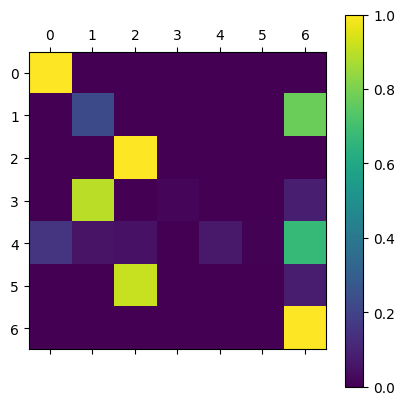

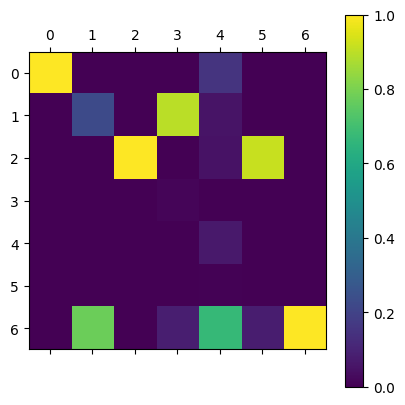

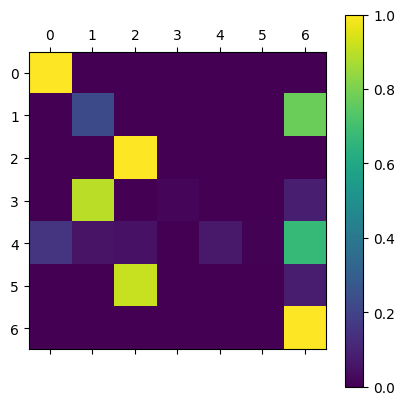

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5511e-17],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [49]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=200)

K= torch.matmul(torch.t(X), torch.t(W_q))
Q = torch.matmul(W_q, X)
# The heart of Attention is this matrix mult, each key is compared with each query
KQ = torch.matmul(K,Q)
print(KQ)
# The results is a symmetric matrix
print(KQ.shape)
# now the Softmax respecting the col
sm_col = torch.nn.Softmax(dim=1)
# now the Softmax respecting the row
sm_row = torch.nn.Softmax(dim=0)
att_col = sm_col(KQ)

print(att_col)
print(att_col.sum(1))

plt.matshow(att_col)
plt.colorbar()
plt.show()

att_row = sm_row(KQ)
# Care softmax dim matters! 
plt.matshow(att_row)
plt.colorbar()
plt.show()

#If we transpose than it is the same as at the top
plt.matshow(torch.t(att_row))
plt.colorbar()
plt.show()

print((att_col - torch.t(att_row))**2)